In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [31]:
path = '/content/drive/My Drive/Colab Notebooks/WomensClothingE-CommerceReviews.csv'
df = pd.read_csv(path)
df.head()


Unnamed: 0  Clothing ID  Age  ...   Division Name Department Name  Class Name
0           0          767   33  ...       Initmates        Intimate   Intimates
1           1         1080   34  ...         General         Dresses     Dresses
2           2         1077   60  ...         General         Dresses     Dresses
3           3         1049   50  ...  General Petite         Bottoms       Pants
4           4          847   47  ...         General            Tops     Blouses

[5 rows x 11 columns]

In [32]:
df.drop(df.columns[0], axis = 1,inplace=True)
df.head()

Clothing ID  Age  ... Department Name Class Name
0          767   33  ...        Intimate  Intimates
1         1080   34  ...         Dresses    Dresses
2         1077   60  ...         Dresses    Dresses
3         1049   50  ...         Bottoms      Pants
4          847   47  ...            Tops    Blouses

[5 rows x 10 columns]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [34]:
df.describe()


Clothing ID           Age  ...  Recommended IND  Positive Feedback Count
count  23486.000000  23486.000000  ...     23486.000000             23486.000000
mean     918.118709     43.198544  ...         0.822362                 2.535936
std      203.298980     12.279544  ...         0.382216                 5.702202
min        0.000000     18.000000  ...         0.000000                 0.000000
25%      861.000000     34.000000  ...         1.000000                 0.000000
50%      936.000000     41.000000  ...         1.000000                 1.000000
75%     1078.000000     52.000000  ...         1.000000                 3.000000
max     1205.000000     99.000000  ...         1.000000               122.000000

[8 rows x 5 columns]

In [35]:
type(df['Review Text'])

pandas.core.series.Series

In [39]:
 df['Review Text']=df['Review Text'].astype(str)
df['Review Length']=df['Review Text'].apply(len)
df.head(10)


Clothing ID  Age  ... Class Name Review Length
0          767   33  ...  Intimates            53
1         1080   34  ...    Dresses           303
2         1077   60  ...    Dresses           500
3         1049   50  ...      Pants           124
4          847   47  ...    Blouses           192
5         1080   49  ...    Dresses           488
6          858   39  ...      Knits           496
7          858   39  ...      Knits           482
8         1077   24  ...    Dresses           166
9         1077   34  ...    Dresses           360

[10 rows x 11 columns]

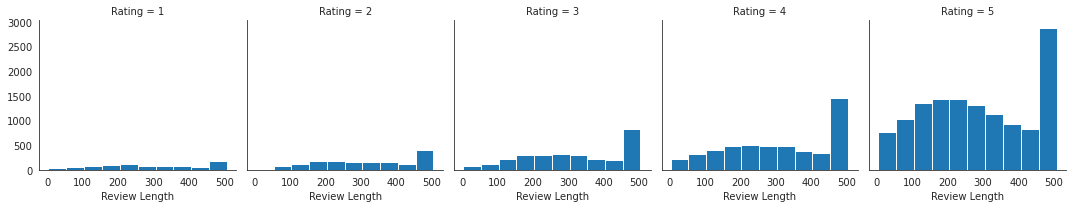

In [40]:
g = sns.FacetGrid(df,col='Rating')
g.map(plt.hist,'Review Length')

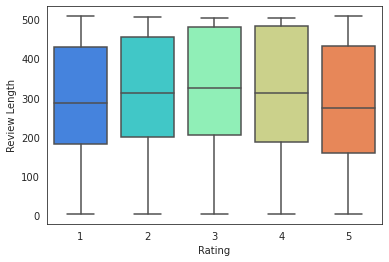

In [41]:
sns.boxplot(x='Rating',y='Review Length',data=df,palette='rainbow')

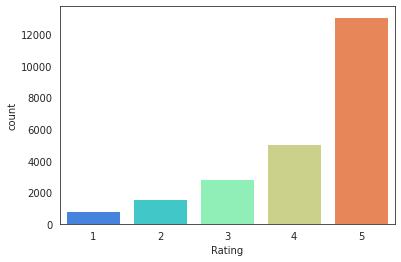

In [42]:
sns.countplot(x='Rating',data=df,palette='rainbow')

In [43]:
ratings = df.groupby('Rating').mean()
ratings

Clothing ID        Age  ...  Positive Feedback Count  Review Length
Rating                          ...                                        
1        916.214964  43.693587  ...                 3.459620     296.627078
2        925.016613  42.622364  ...                 3.325879     315.383387
3        928.110414  42.158481  ...                 3.145246     322.001742
4        921.410282  42.887532  ...                 2.405554     311.784321
5        913.961389  43.583124  ...                 2.299749     284.883634

[5 rows x 5 columns]

In [44]:
ratings.corr()

Clothing ID  ...  Review Length
Clothing ID                 1.000000  ...       0.975037
Age                        -0.977686  ...      -0.930949
Recommended IND            -0.303355  ...      -0.307808
Positive Feedback Count     0.378828  ...       0.384312
Review Length               0.975037  ...       1.000000

[5 rows x 5 columns]

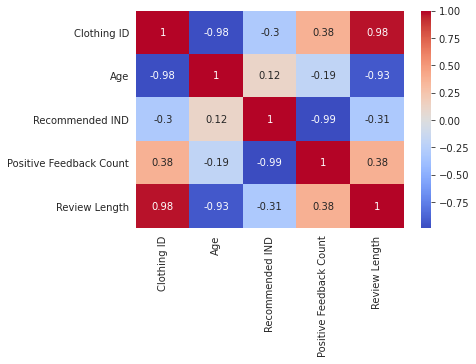

In [45]:
sns.heatmap(ratings.corr(),cmap='coolwarm',annot=True)

In [0]:
df_part = df[(df.Rating==1) | (df.Rating==5)]


In [0]:
X = df_part['Review Text'].astype(str)

y = df_part['Rating']

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [0]:
X = cv.fit_transform(X)
#transformer=CountVectorizer(analyzer=text_process).fit(X)
#X = bow_transformer.transform(X)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [0]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [80]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
predictions = nb.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix,classification_report

In [83]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 107  139]
 [  13 3933]]


              precision    recall  f1-score   support

           1       0.89      0.43      0.58       246
           5       0.97      1.00      0.98      3946

    accuracy                           0.96      4192
   macro avg       0.93      0.72      0.78      4192
weighted avg       0.96      0.96      0.96      4192



In [0]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [0]:
from sklearn.pipeline import Pipeline

In [0]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [0]:
X = df_part['Review Text']
y = df_part['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [88]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
predictions = pipeline.predict(X_test)

In [90]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[   0  246]
 [   0 3946]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       246
           5       0.94      1.00      0.97      3946

    accuracy                           0.94      4192
   macro avg       0.47      0.50      0.48      4192
weighted avg       0.89      0.94      0.91      4192



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
